In [1]:
import pyproj
from tkinter import *
import json
import numpy
import geojson
from geojson import Feature, Point, FeatureCollection, Polygon, MultiLineString
import random
import utm
from shapely.geometry import shape, GeometryCollection, Polygon, LineString, MultiLineString
import shapely.ops as ops
import matplotlib.pyplot as plt
import serial
import keyboard

import time
from datetime import datetime
import pyautogui
import logging
import pytz
logging.basicConfig(filename='GPRCoveragelogs.txt', level=logging.DEBUG,format='%(asctime)s-%(levelname)s-%(message)s')

import geopandas as gpd
from shapely.ops import cascaded_union, unary_union
import plotly.express as px
import plotly.graph_objects as go

In [2]:
gps = serial.Serial(
        port='COM4',
        baudrate = 115200,
        parity=serial.PARITY_NONE,
        stopbits=serial.STOPBITS_ONE,
        bytesize=serial.EIGHTBITS,
        timeout=1
)

In [3]:
print(pyautogui.size())

def geoscopeon():
    # moves to (519,1060) in 1 sec
    pyautogui.moveTo(611, 533, duration = .1)

    # simulates a click at the present
    # mouse position
    pyautogui.click()
    
    
def geoscopeoff():
    # moves to (519,1060) in 1 sec
    pyautogui.moveTo(708, 533, duration = .1)

    # simulates a click at the present
    # mouse position
    pyautogui.click()

Size(width=1920, height=1080)


In [4]:
def readGPS(gps,GPSlatitude,GPSlongitude,GPSspeed,GPSheading,timestring,gpsFix):
    data = gps.readline()
    data=data.decode() #must convert byte to string
    message = data[0:6]
    #print(data)
    if (message == "$GPRMC"):
        # GPRMC = Recommended minimum specific GPS/Transit data
        # Reading the GPS fix data is an alternative approach that also works
        parts = data.split(",")
        if parts[2] == 'V':
            # V = Warning, most likely, there are no satellites in view...
            print ("GPS receiver warning")
        else:            
            # Get the position data that was transmitted with the GPRMC message
            # In this example, I'm only interested in the longitude and latitude
            # for other values, that can be read, refer to: http://aprs.gids.nl/nmea/#rmc
            LatDir=parts[4]
            LongDir=parts[6]
            GPSlongitude = formatDegreesMinutes(parts[5],"Long",LongDir)
            GPSlatitude = formatDegreesMinutes(parts[3],"Lat",LatDir)
            GPSspeed=float(parts[7])*1.15077945
            course=parts[8]
            Date=parts[9]
            day=int(Date[:2])
            month=int(Date[2:4])
            year=int("20"+Date[4:])
            #timestring=datetime(year,month,day)       
            #print ("Your position: lon = " + str(GPSlongitude) + ", lat = " + str(GPSlatitude) + " GPSspeed = " + str(GPSspeed)+" Course = " + str(course))
            data = gps.readline()
            data=data.decode() #must convert byte to string
            message = data[0:6]
            

    if (message == "$GPGGA"):
        # GPRMC = Recommended minimum specific GPS/Transit data
        # Reading the GPS fix data is an alternative approach that also works
        parts = data.split(",")
        if parts[6] == 0:
            # V = Warning, most likely, there are no satellites in view...
            print ("GPS receiver warning")
        else:
            # Get the position data that was transmitted with the GPRMC message
            # In this example, I'm only interested in the longitude and latitude
            # for other values, that can be read, refer to: http://aprs.gids.nl/nmea/#rmc
            LatDir=parts[3]
            LongDir=parts[5]
            GPSlongitude = formatDegreesMinutes(parts[4],"Long",LongDir)
            GPSlatitude = formatDegreesMinutes(parts[2],"Lat",LatDir)
            Time=parts[1]
            Hour=int(Time[:2])
            Minute=int(Time[2:4])
            Second=int(Time[4:6])
            gpsFix=parts[6]
            timestring=datetime(year, month, day, Hour, Minute,Second)
            timestring = timestring.astimezone(target_time_zone)
            #print ("Your position: lon = " + str(GPSlongitude) + ", lat = " + str(GPSlatitude))

    return(GPSlatitude,GPSlongitude,GPSspeed,GPSheading,timestring,gpsFix) 




def formatDegreesMinutes(coordinates, type, direction):
    parts = coordinates.split(".")
    left = parts[0]    
    right = parts[1]

    if type=="Lat":
        degrees = int(left[:2])
        minutes=int(float(left[2:]+right)/60)


    
    if type=="Long":
        degrees = int(left[:3])
        minutes=int(float(left[3:]+right)/60)


    if direction == "W" or direction == "S":
        degrees=-degrees
    string=str(degrees) + "." + str(minutes)
    Coordinates=float(string[:-2])
    return Coordinates

Enter the Project Name: DC Turf Field
Start reading num 1? t
error
error
You Pressed A Key!
42


C:\Users\14438\anaconda3\envs\gprcoverage\lib\site-packages\geopandas\plotting.py:407: UserWarning:

The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.



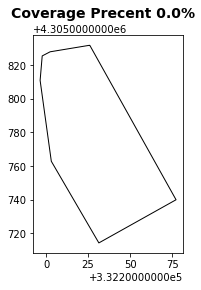

Start reading num 2? t
error
You Pressed A Key!
64


C:\Users\14438\anaconda3\envs\gprcoverage\lib\site-packages\geopandas\plotting.py:407: UserWarning:

The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.



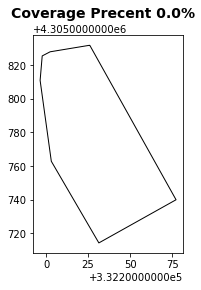

Start reading num 3? t
You Pressed A Key!
29


C:\Users\14438\anaconda3\envs\gprcoverage\lib\site-packages\geopandas\plotting.py:407: UserWarning:

The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.



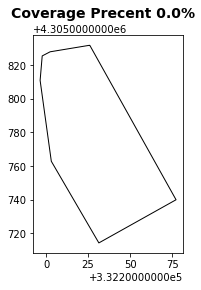

Start reading num 4? t
error
You Pressed A Key!
61


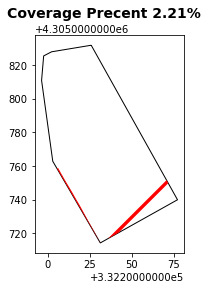

Start reading num 5? t
error
You Pressed A Key!
62


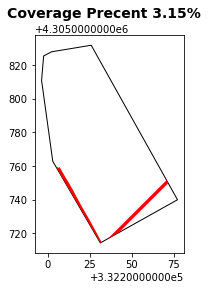

Start reading num 6? t
error
You Pressed A Key!
115


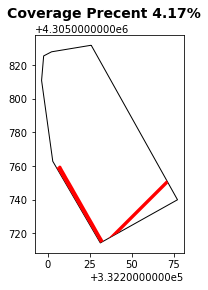

Start reading num 7? t
error
You Pressed A Key!
47


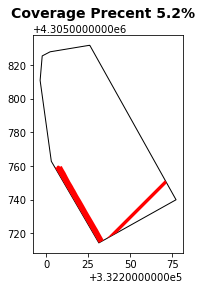

Start reading num 8? t
error
You Pressed A Key!
47


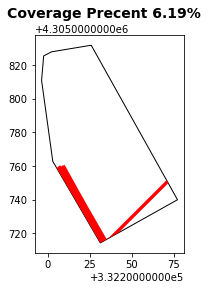

Start reading num 9? t
error
You Pressed A Key!
53


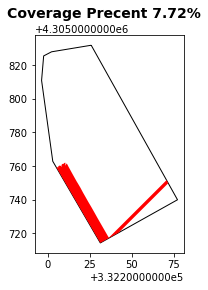

Start reading num 10? t
error
You Pressed A Key!
47


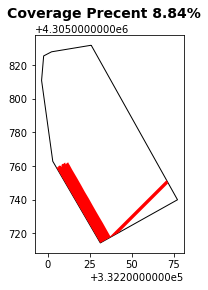

Start reading num 11? t
error
You Pressed A Key!
42


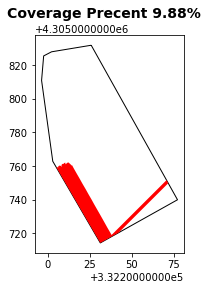

Start reading num 12? t
You Pressed A Key!
0


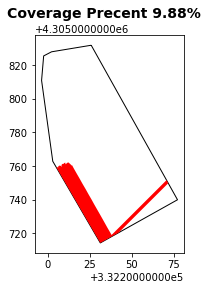

Start reading num 13? t
error
You Pressed A Key!
53


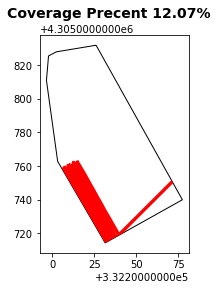

Start reading num 14? t
error
error
You Pressed A Key!
50


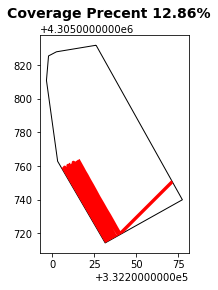

Start reading num 15? t
error
You Pressed A Key!
46


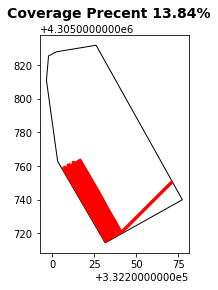

Start reading num 16? t
error
You Pressed A Key!
56


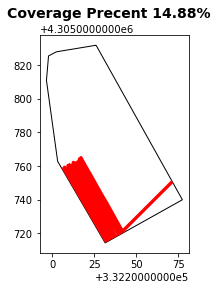

Start reading num 17? t
error
error
You Pressed A Key!
68


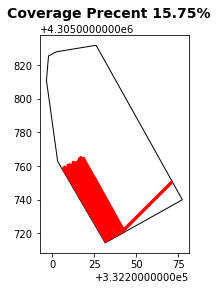

Start reading num 18? t
error
You Pressed A Key!
52


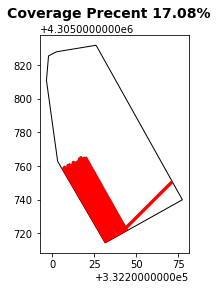

Start reading num 19? t
error
You Pressed A Key!
50


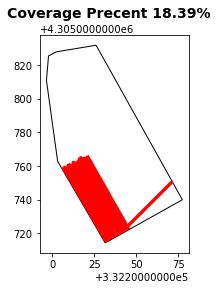

Start reading num 20? t
error
You Pressed A Key!
45


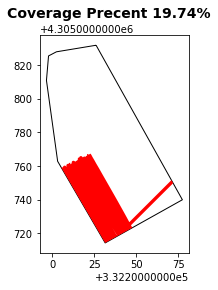

Start reading num 21? t
error
You Pressed A Key!
53


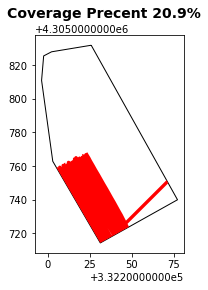

Start reading num 22? t
error
You Pressed A Key!
46


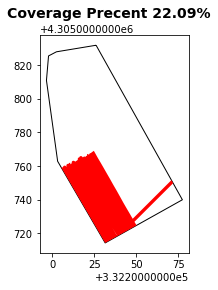

Start reading num 23? t
error
You Pressed A Key!
59


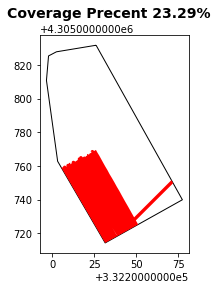

Start reading num 24? t
error
You Pressed A Key!
55


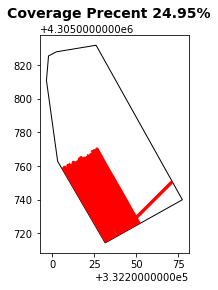

Start reading num 25? t
You Pressed A Key!
0


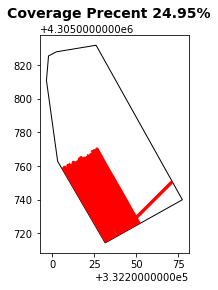

Start reading num 26? t                       
Invalid input please enter t or f!
Start reading num 26? t
error
You Pressed A Key!
55


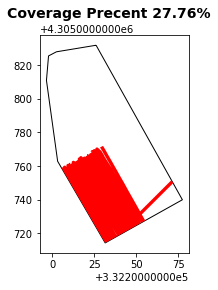

Start reading num 27? t
error
error
You Pressed A Key!
47


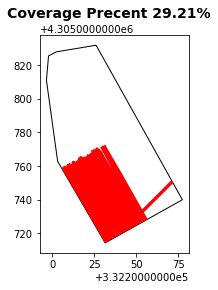

Start reading num 28? t
error
You Pressed A Key!
52


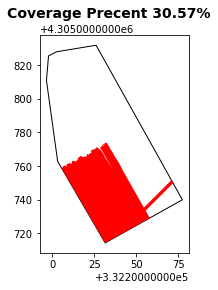

Start reading num 29? t
error
You Pressed A Key!
45


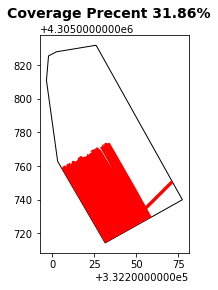

Start reading num 30? t
error
You Pressed A Key!
49


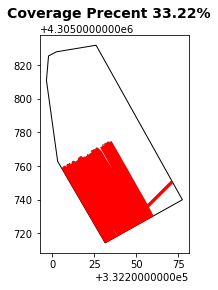

Start reading num 31? t
error
You Pressed A Key!
56


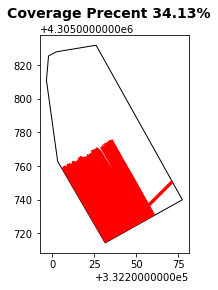

Start reading num 32? t
error
You Pressed A Key!
48


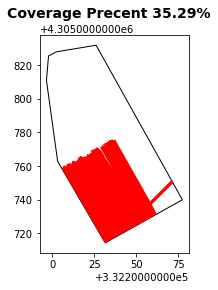

Start reading num 33? t
error
You Pressed A Key!
56


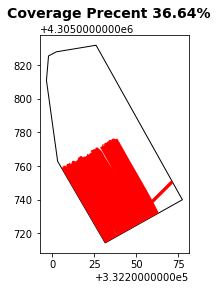

Start reading num 34? t
error
You Pressed A Key!
49


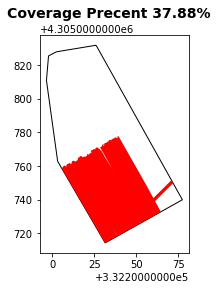

Start reading num 35? t
error
You Pressed A Key!
58


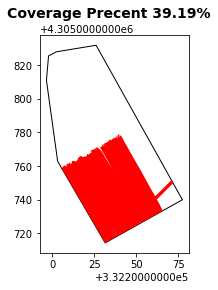

Start reading num 36? t
error
You Pressed A Key!
52


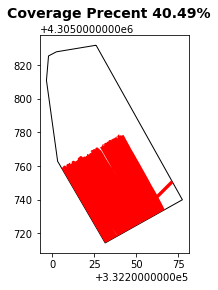

Start reading num 37? t
error
You Pressed A Key!
56


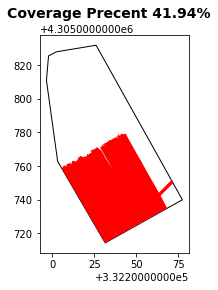

Start reading num 38? t
error
You Pressed A Key!
73


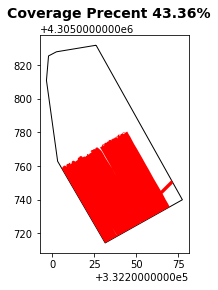

In [ ]:

lines=[]
jsonarray=[]
linestring=[]
readingnumber=0

GPSlatitude,GPSlongitude,GPSspeed,GPSheading,timestring,gpsFix=0,0,0,0,0,0
target_time_zone =  pytz.timezone('US/Eastern')


contiuneproject=True
contiunereadings=True


def get_bool(prompt):
    while True:
        try:
           return {"t":True,"f":False}[input(prompt).lower()]
        except KeyError:
           print("Invalid input please enter t or f!")


def generatejson(array):
  string=geojson.Feature(geometry=geojson.MultiLineString(array))  # doctest: +ELLIPSIS
  return(string)


def utmpolyconverter(jsonName):
  #load in data
  with open(jsonName) as f:
      data = json.load(f)

  #traverse data in json string
  for feature in data['features']:
      #all coordinates
      coords = feature['geometry']['coordinates']
      #coordList is for each individual polygon
      for coordList in coords:

          #each point in list
          for coordPair in coordList:
              #print (coordPair)
              lat = coordPair[1]           
              lon = coordPair[0]
              lat_grid, lon_grid = numpy.meshgrid(lat, lon)
              #do transformation
              x, y ,z,s= utm.from_latlon(lat_grid, lon_grid)
              coordPair[0]=x[0][0]
              coordPair[1]=y[0][0]

  return (coordList)

def grouped(iterable, n):
    "s -> (s0,s1,s2,...sn-1), (sn,sn+1,sn+2,...s2n-1), (s2n,s2n+1,s2n+2,...s3n-1), ..."
    return zip(*[iter(iterable)]*n)

def utmlineconverter(jsonName):
  #load in data
  with open(jsonName) as f:
      data = json.load(f)

  #traverse data in json string
  for feature in data['features']:
    #all coordinates
    coords = feature['geometry']['coordinates']
    #coordList is for each individual polygon
    for coordList in coords:
      for coordPair in coordList:
          #print (coordPair)
          lat = coordPair[1]            
          lon = coordPair[0]
          lat_grid, lon_grid = numpy.meshgrid(lat, lon)
          #do transformation
          x, y ,z,s= utm.from_latlon(lat_grid, lon_grid)
          coordPair[0]=x[0][0]
          coordPair[1]=y[0][0]

    line = LineString(coordList) #convert corrdinates to line string
    dilated = line.buffer(1, cap_style=2) #expand line to have area
    lines.append(dilated) #combine all linestrings into a multi polygon and send back
  return (lines)


#print(utmpolyconverter("coverage.json"))





#print(utmlineconverter("path.json"))
def measurecoverage(jsonpath):
  #get bridge poly


#   with open("coverage.json") as f:
#   bridgepoly = json.load(f)["features"]

# # with open("path.json") as f:
# #   scanpath = json.load(f)["features"]

  Bridgestring = utmpolyconverter("coverage.json")
  bridgepolygon = Polygon(Bridgestring)
  bridgearea=bridgepolygon.area

  #get current path poly
  lines = utmlineconverter(jsonpath)
  lines=unary_union(lines)
  Intersection=bridgepolygon.intersection(lines)
  patharea=Intersection.area

  coverageprecent=round(patharea/bridgearea*100,2)

  base = gpd.GeoSeries(bridgepolygon)
  scanpaths = gpd.GeoSeries(Intersection)

  fig, ax = plt.subplots()
  ax.set_aspect('equal')
  fig.suptitle("Coverage Precent "+str(coverageprecent)+"%", fontsize=14, fontweight='bold')
  base.plot(ax=ax,facecolor="none", edgecolor="black")
  scanpaths.plot(ax=ax,color='red')
  plt.show();
  return (coverageprecent)




token = 'pk.eyJ1Ijoicm9zc2N1dHRzIiwiYSI6ImNrdW9iYnl6ajA3OXMycHBnb2JxbXZpY3gifQ.RD-jqtc5p3UJnrLcJhZHLA'


fig = go.Figure(go.Scattermapbox())
fig.update_layout(mapbox_style="satellite-streets", mapbox_accesstoken=token)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()


# with open("coverage.json") as f:
#   bridgepoly = json.load(f)["features"]

# with open("path.json") as f:
#   scanpath = json.load(f)["features"]


latlist=[]

lonlist=[]

inlat=39.221864
inlong=-76.837014

# fig.add_trace(go.Scattermapbox(
#     mode = "markers+lines",
#     lon = latlist,
#     lat = lonlist,
#     marker = {'size': 10}))

# fig.update_layout(
#     mapbox = {
#         'style': "satellite-streets",
#         'accesstoken': token,
#         'center': { 'lon': inlong, 'lat': inlat},
#         'zoom': 12, 'layers': [{
#             'source': {
#                 'type': "FeatureCollection",
#                 'features': bridgepolygon
#             },
#             'type': "fill", 'below': "traces", 'color': "royalblue"}]},
#     margin = {'l':0, 'r':0, 'b':0, 't':0})


  # fig.update_mapboxes(layers=[
  #     {
  #         'source': feature, 
  #         'type': "line", 
  #         'line': {'width': 5},
  #         'below': "traces", 
  #         'color': "royalblue"
  #     } for feature in scanpath.features])
  




# for i in range(0,10):
#   inlat=randrange(30)
#   inlong=randrange(50)
#   latlist,lonlist=plotdata(latlist,lonlist,inlat,inlong)
#   print(latlist,lonlist)

#fig.show() 



#write reprojected json to new file
# with open('path_to_new_file.json', 'w') as f:
#     f.write(json.dumps(data))
  

# Sq. Meters	5177.03
# Sq. Kilometers	0.01
# Sq. Feet	55725.07
# Acres	1.28
# Sq. Miles	0.00


#save the site geometery

r=0
t=0


jobname = input("Enter the Project Name: ")

# while True:
#   linestring=[]
#   readingnumber+=1
  
#   check=get_bool("Start reading num "+str(readingnumber)+"? ")
#   if check==True:
# #    try:
# #      while True:
#     for r in range(0,4):
#       linestring.append(tuple((random.randrange(-7684289,-7684120)/100000,random.randrange(3920819,3920881)/100000)))#add gps points here
#       jsonarray.append(linestring)
#       r+=1
      
# #    except KeyboardInterrupt:
# #      pass
#   t+=1
#   #print(jsonarray)
#   #print(generatejson(jsonarray))

#   #print(geojson.FeatureCollection(generatejson(jsonarray)))
#   filename=jobname+" Run#"+str(readingnumber)+'.json'   
#   with open(filename, 'w') as f:#save a copy of file after everyrun
#     f.write(geojson.dumps(geojson.FeatureCollection([generatejson(jsonarray)]), indent=4))
    
    
    
    
    
  
while True:
  linestring=[]
  readingnumber+=1
  r=0
  
  check=get_bool("Start reading num "+str(readingnumber)+"? ")
  if check==True:
    geoscopeon()
    while True:  #making a loop
        try:  #used try so that if user pressed other than the given key error will not be shown
            if keyboard.is_pressed(' '): #if key space is pressed.You can also use right,left,up,down and others like a,b,c,etc.
                print('You Pressed A Key!')
                geoscopeoff()
                #pause gpr here
                break #finishing the loop
            else:
                #print(r)
                time.sleep(.5)
                latmove,longmove,GPSspeed,GPSheading,timestring,gpsFix=readGPS(gps,GPSlatitude,GPSlongitude,GPSspeed,GPSheading,timestring,gpsFix)
                #print(latmove)
                #print(longmove)
                linestring.append(tuple((longmove,latmove)))#add gps points here
                jsonarray.append(linestring)
                r+=1
        except:
            print("error")


  
  print(r) 
  t+=1        
  filename=jobname+" Run#"+str(readingnumber)+'.json'    
  #print(jsonarray)
  with open(filename, 'w') as f:#save a copy of file after everyrun
    f.write(geojson.dumps(geojson.FeatureCollection([generatejson(jsonarray)]), indent=4))
    

 
  measurecoverage(str(filename))